# Exploring the World Happiness Report
Last Updated: January 27th, 2025

Daily Challenge: Exploring the World Happiness Report with Matplotlib


## 👩‍🏫 👩🏿‍🏫 What You’ll learn
use Matplotlib alongside pandas to analyze
visualize data from the World Happiness Report
focus on aspects like happiness scores, economic factors, and regional differences.


## 🛠️ What you will create
craft a series of data visualizations using the World Happiness Report dataset
uncover insights about global happiness trends and influencing factors.

## 1. Chargement et inspection des données

In [21]:
import pandas as pd

# Charger le fichier
df = pd.read_csv('2015.csv')

# Vérifier les premières lignes
print(df.head())

# Vérifier les colonnes présentes
print(df.columns)


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

###  2. Prétraitement (valeurs manquantes, types)

In [22]:
# Nettoyage : valeurs manquantes
print(df.isnull().sum())

# Suppression des lignes incomplètes
df = df.dropna()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


### 3. Scatter plot : Social support vs. Happiness Score

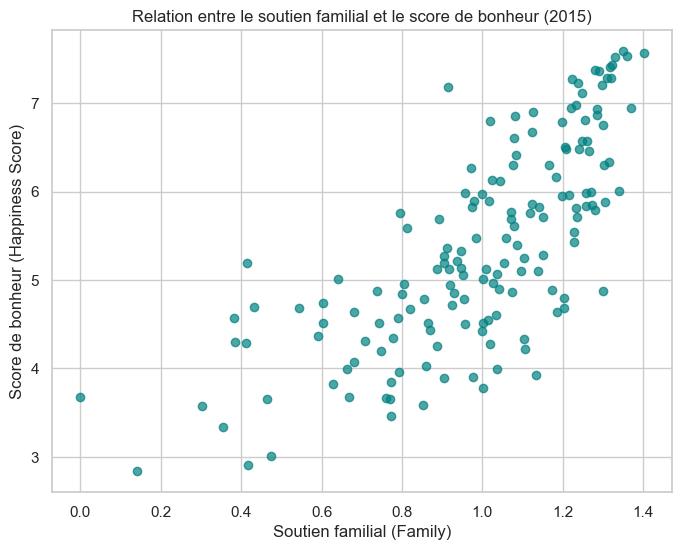

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('2015.csv')

# Nettoyage des valeurs manquantes
df = df.dropna()

# Scatter plot : Family (soutien social) vs Happiness Score
plt.figure(figsize=(8, 6))
plt.scatter(df['Family'], df['Happiness Score'], alpha=0.7, color='teal')
plt.title("Relation entre le soutien familial et le score de bonheur (2015)")
plt.xlabel("Soutien familial (Family)")
plt.ylabel("Score de bonheur (Happiness Score)")
plt.grid(True)
plt.show()


### 4. Comparaison régionale (PIB et santé)

In [27]:
import matplotlib.pyplot as plt

# Agrégation par région
region_grouped = df.groupby('Region').agg({
    'Economy (GDP per Capita)': 'mean',
    'Health (Life Expectancy)': 'mean'
}).reset_index()


### 5. Graphique combiné : Bar + Line par région

C:\Users\chume\AppData\Local\Temp\ipykernel_9068\2232317762.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(region_grouped['Region'], rotation=45, ha='right')


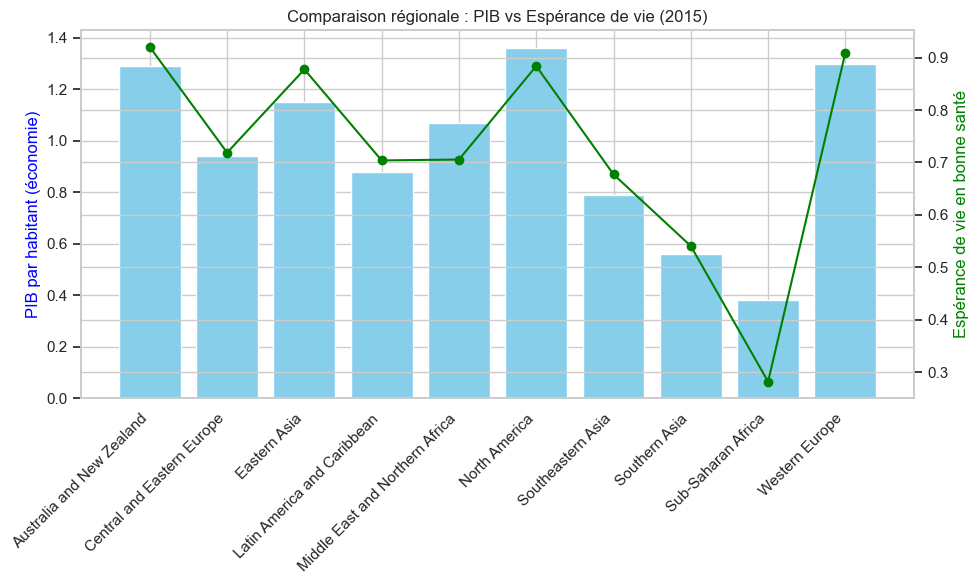

In [28]:
# Création du graphique combiné
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barres : PIB
ax1.bar(region_grouped['Region'], region_grouped['Economy (GDP per Capita)'], color='skyblue')
ax1.set_ylabel("PIB par habitant (économie)", color='blue')
ax1.set_xticklabels(region_grouped['Region'], rotation=45, ha='right')

# Ligne : espérance de vie
ax2 = ax1.twinx()
ax2.plot(region_grouped['Region'], region_grouped['Health (Life Expectancy)'], color='green', marker='o')
ax2.set_ylabel("Espérance de vie en bonne santé", color='green')

# Titre final
plt.title("Comparaison régionale : PIB vs Espérance de vie (2015)")
plt.tight_layout()
plt.show()
